## Observations and Insights 

Analysis 
* Box plot of four Drug Regimens showed that Infubinol and Ceftamin have higher mean/median than Capomulin and Ramicane.
* Mice s185 Tumor Volume by Timepoint line plot showed that tumor volume decreased as timepoint increased. 
* Linear regression showed that there were positive correlation between mouse weight and average tumor volume at Capomulin drug regimen.

In [204]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [205]:
mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [206]:
study_results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [207]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on=("Mouse ID"))
# Display the data table for preview
mouse_study.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [208]:
# Checking the number of mice.
mice_number = mouse_study.groupby(["Mouse ID"]).count()["Drug Regimen"]
mice_number = len(mice_number)
mice_number

249

In [209]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study["Mouse ID"].duplicated()
mouse_study[["Mouse ID","Timepoint"]].head()

Mouse ID  Timepoint
0     k403          0
1     k403          5
2     k403         10
3     k403         15
4     k403         20

In [210]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study["Mouse ID"].duplicated()
mouse_study.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [211]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study.drop_duplicates(["Mouse ID"], keep = "last")
clean_mouse_study.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9      k403     Ramicane    Male          21          16         45   
19     s185    Capomulin  Female           3          17         45   
29     x401    Capomulin  Female          16          15         45   
39     m601    Capomulin    Male          22          17         45   
49     g791     Ramicane    Male          11          16         45   

    Tumor Volume (mm3)  Metastatic Sites  
9            22.050126                 1  
19           23.343598                 1  
29           28.484033                 0  
39           28.430964                 1  
49           29.128472                 1

In [212]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [213]:
mouse_study.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [214]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_mean = mouse_study.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_med = mouse_study.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_var = mouse_study.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_sd = mouse_study.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = mouse_study.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

print("Tumor Volume Summary Statistics")
tumor_volume_statistics = pd.DataFrame ({'Mean':tumor_mean,
                                                'Median':tumor_med,
                                                'Variance':tumor_var,
                                                'Standard Deviation':tumor_sd,
                                                'SEM':tumor_sem})
tumor_volume_statistics

Tumor Volume Summary Statistics


Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [215]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
simpler_tumor_volume_statistics = mouse_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
simpler_tumor_volume_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [216]:
mouse_study.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

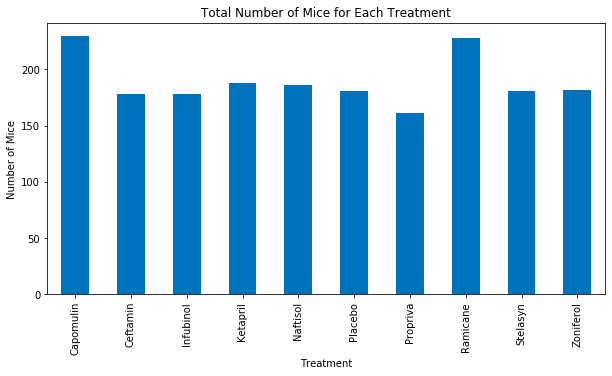

In [217]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
sort_by_treatment = mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"]
pandas_sort_by_treatment = sort_by_treatment.plot(kind="bar",color='#0072BD', title = "Total Number of Mice for Each Treatment",figsize=(10,5))
pandas_sort_by_treatment.set_xlabel("Treatment")
pandas_sort_by_treatment.set_ylabel("Number of Mice")
plt.savefig('Image 1')
plt.show()

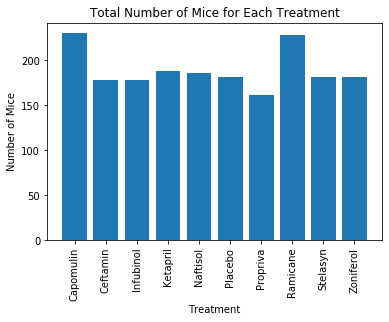

In [218]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y = mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"]
x = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt_sort_by_treatment=plt.bar(x, y, align="center")
plt.xticks(rotation=90)
plt.title("Total Number of Mice for Each Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")
plt.savefig('Image 2')
plt.show()

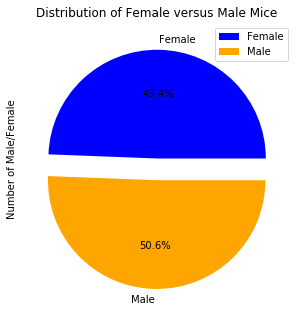

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sort_by_sex = mouse_study.groupby(["Sex"]).count()["Mouse ID"]
sort_by_sex = pd.DataFrame(sort_by_sex)
sort_by_sex = sort_by_sex.rename(columns={'Mouse ID':'Number of Male/Female'})
pandas_sort_by_sex = sort_by_sex.plot(kind='pie', y="Number of Male/Female", autopct = '%1.1f%%', explode=[0, 0.2], legend=True, title="Distribution of Female versus Male Mice", figsize=(10,5), colors=["blue","orange"])
pandas_sort_by_sex.legend(loc='best')
plt.savefig('Image 3')
plt.show()

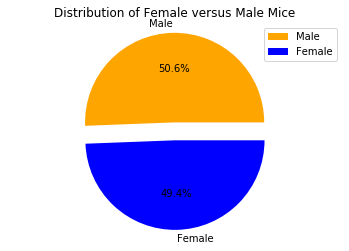

In [220]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = mouse_study["Sex"].value_counts()
colors=["orange","blue"]
plt.pie(sex_count, labels = sex_count.index, autopct="%1.1f%%", explode = [0, 0.2], colors=colors)
plt.legend(loc="best")
plt.title("Distribution of Female versus Male Mice")
plt.axis("equal")
plt.savefig('Image 4')
plt.show()

## Quartiles, Outliers and Boxplots

In [221]:
mouse_study.tail(20)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1873     z795     Naftisol  Female          13          29          0   
1874     z795     Naftisol  Female          13          29          5   
1875     z795     Naftisol  Female          13          29         10   
1876     z795     Naftisol  Female          13          29         15   
1877     z795     Naftisol  Female          13          29         20   
1878     z795     Naftisol  Female          13          29         25   
1879     z795     Naftisol  Female          13          29         30   
1880     z795     Naftisol  Female          13          29         35   
1881     z795     Naftisol  Female          13          29         40   
1882     z795     Naftisol  Female          13          29         45   
1883     z969     Naftisol    Male           9          30          0   
1884     z969     Naftisol    Male           9          30          5   
1885     z969     Naftisol    Male           9          30         10   
1886     z969     Naftisol    Male           9          30         15   
1887     z969     Naftisol    Male           9          30         20   
1888     z969     Naftisol    Male           9          30         25   
1889     z969     Naftisol    Male           9          30         30   
1890     z969     Naftisol    Male           9          30         35   
1891     z969     Naftisol    Male           9          30         40   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
1873           45.000000                 0  
1874           46.833475                 0  
1875           48.030804                 0  
1876           49.368132                 1  
1877           53.280657                 1  
1878           57.947100                 2  
1879           59.789636                 2  
1880           60.435654                 2  
1881           62.376639                 3  
1882           65.741070                 3  
1883           45.000000                 0  
1884           49.332999                 0  
1885           52.656081                 1  
1886           54.713005                 2  
1887           57.898778                 2  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4

In [222]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
by_regimen = mouse_study.set_index(["Drug Regimen"])
by_regimen = by_regimen.loc[["Capomulin","Ramicane","Infubinol","Ceftamin"],["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drop_by_greatest_timepoint=mouse_study.drop_duplicates("Mouse ID",keep="last")
max_timepoint = pd.merge(drop_by_greatest_timepoint[["Mouse ID","Timepoint"]],mouse_study, on=["Mouse ID","Timepoint"], how="left")
max_timepoint

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       k403         45     Ramicane    Male          21          16   
1       s185         45    Capomulin  Female           3          17   
2       x401         45    Capomulin  Female          16          15   
3       m601         45    Capomulin    Male          22          17   
4       g791         45     Ramicane    Male          11          16   
..       ...        ...          ...     ...         ...         ...   
244     z314          5     Stelasyn  Female          21          28   
245     z435         10     Propriva  Female          12          26   
246     z581         45    Infubinol  Female          24          25   
247     z795         45     Naftisol  Female          13          29   
248     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             22.050126                 1  
1             23.343598                 1  
2             28.484033                 0  
3             28.430964                 1  
4             29.128472                 1  
..                  ...               ...  
244           45.934712                 0  
245           48.710661                 0  
246           62.754451                 3  
247           65.741070                 3  
248           73.867845                 4  

[249 rows x 8 columns]

In [223]:
# Put treatments into a list for for loop (and later for plot labels
# Create empty list to fill with tumor vol data (for plotting)
drug_regimen = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
tumor_volume = []

for x in drug_regimen:
    drug_data=max_timepoint.loc[max_timepoint["Drug Regimen"]==x]["Tumor Volume (mm3)"]
    tumor_volume.append(drug_data)
    quartiles = drug_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{x} potential outliers: {drug_data.loc[(drug_data< lower_bound) | (drug_data> upper_bound)]}") 

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


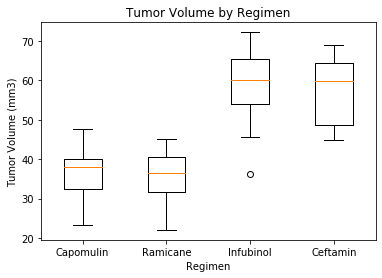

In [224]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume, labels=drug_regimen)
plt.title("Tumor Volume by Regimen")
plt.xlabel("Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('Image 5')
plt.show()

## Line and Scatter Plots

In [225]:
capomulin = mouse_study.loc[(mouse_study["Drug Regimen"]=="Capomulin")]
cap_mouseid = capomulin.loc[(capomulin["Mouse ID"]=="s185")]
cap_mouseid

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  
15           33.949940                 0  
16           32.959671                 1  
17           28.328531                 1  
18           25.472143                 1  
19           23.343598                 1

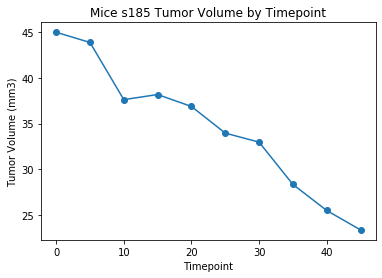

In [226]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(cap_mouseid["Timepoint"],cap_mouseid["Tumor Volume (mm3)"], marker="o")

plt.title("Mice s185 Tumor Volume by Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('Image 6')
plt.show()

In [227]:
capomulin_average = capomulin.groupby(["Drug Regimen","Weight (g)"]).mean()["Tumor Volume (mm3)"]
capomulin_average = capomulin_average.reset_index()
capomulin_average

Drug Regimen  Weight (g)  Tumor Volume (mm3)
0    Capomulin          15           36.182040
1    Capomulin          17           37.214133
2    Capomulin          19           41.182391
3    Capomulin          20           39.141053
4    Capomulin          21           42.088700
5    Capomulin          22           43.288490
6    Capomulin          23           43.341051
7    Capomulin          24           44.805810
8    Capomulin          25           44.062109

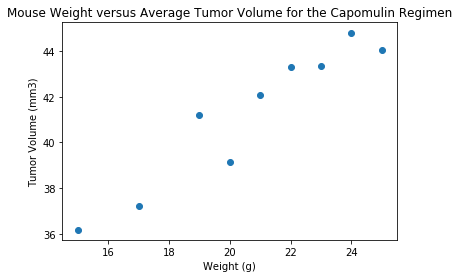

In [228]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
plt.title("Mouse Weight versus Average Tumor Volume for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('Image 7')
plt.show()

## Correlation and Regression

rvalue is 0.95
The r-square is: 0.9
linear regression is y = 0.89x + 22.76


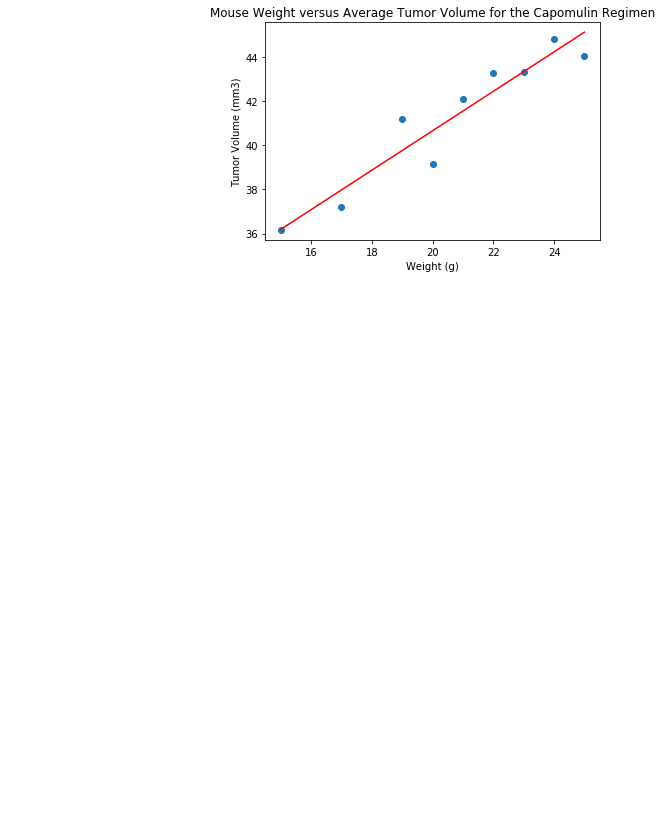

In [229]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_average.iloc[:,1]
y_values = capomulin_average.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight versus Average Tumor Volume for the Capomulin Regimen')

print(f"rvalue is {round(rvalue,2)}")
print(f"The r-square is: {round(rvalue**2,2)}")
print(f"linear regression is {line_eq}")

plt.savefig('Image 8')
plt.show()